<a href="https://colab.research.google.com/github/aya843/colabtools/blob/main/Welcome_To_Colaboratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Dynamic Time Warping **

The dtw-python module is a faithful Python equivalent of the R package; it provides the same algorithms and options.

**Installation**

In [1]:
pip install dtw-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 745.0/745.0 kB 3.3 MB/s eta 0:00:00


In [3]:
 from dtw import *


Importing the dtw module. When using in academic works please cite:
  T. Giorgino. Computing and Visualizing Dynamic Time Warping Alignments in R: The dtw Package.
  J. Stat. Soft., doi:10.18637/jss.v031.i07.



**Differences with R**

Indices are 0-based
R uses 1-based indexing, whereas Python uses 0-based arrays. Wherever indices are returned (most importantly in the .index1, .index2, .index1s and .index2s attributes of alignments), these must be assumed to be 0-based in Python. Hence, indices can be used as subscripts in both environments as natural.

Object-oriented methods
Python OO method calls use the postfix "dot" notation. This mostly affects the plot() methods. Note that non-overloaded functional style such as dtwPlotThreeWay are unaffected. Hence:

Step pattern recursion:
 g[i,j] = min(
     g[i-3,j-2] +     d[i-2,j-1] +     d[i-1,j  ] +     d[i  ,j  ] ,
     g[i-1,j-1] +     d[i  ,j  ] ,
     g[i-2,j-3] +     d[i-1,j-2] +     d[i  ,j-1] + 0 * d[i  ,j  ] ,
 ) 

Normalization hint: N



/usr/local/lib/python3.10/dist-packages/dtw/stepPattern.py:341: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(-x[ss, 1], -x[ss, 2], 'o', color="black", marker="o", fillstyle="none")


<Axes: xlabel='Query index', ylabel='Reference index'>

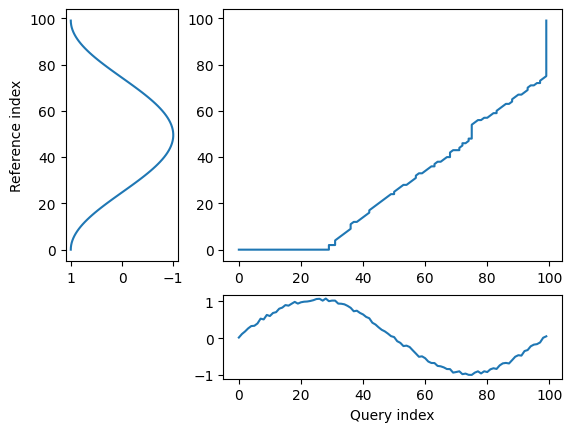

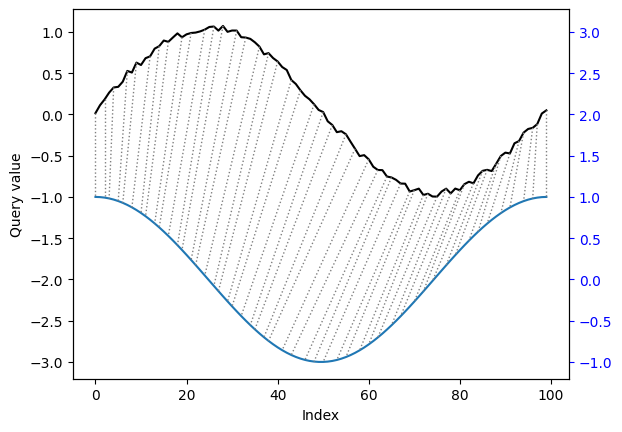

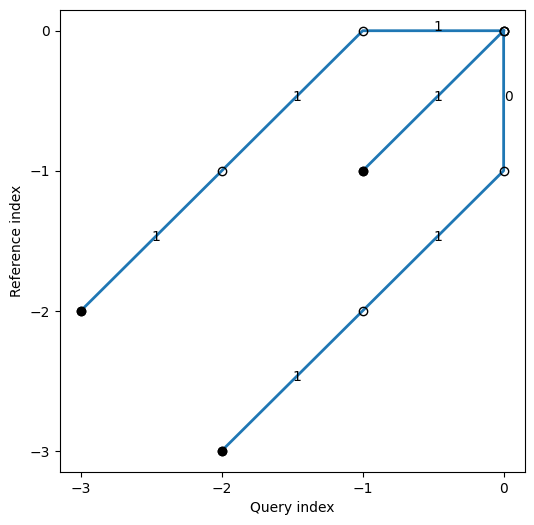

In [4]:
import numpy as np

## A noisy sine wave as query
idx = np.linspace(0,6.28,num=100)
query = np.sin(idx) + np.random.uniform(size=100)/10.0

## A cosine is for template; sin and cos are offset by 25 samples
template = np.cos(idx)

## Find the best match with the canonical recursion formula
from dtw import *
alignment = dtw(query, template, keep_internals=True)

## Display the warping curve, i.e. the alignment curve
alignment.plot(type="threeway")

## Align and plot with the Rabiner-Juang type VI-c unsmoothed recursion
dtw(query, template, keep_internals=True,
    step_pattern=rabinerJuangStepPattern(6, "c"))\
    .plot(type="twoway",offset=-2)

## See the recursion relation, as formula and diagram
print(rabinerJuangStepPattern(6,"c"))
rabinerJuangStepPattern(6,"c").plot()

**The alignment class**

The class name of alignment objects in DTW (all capitals) in Python. Its attributes are accessed with the usual "dot" notation (R uses $ as for lists).

**Dots vs underscores **

R commonly uses the dot (.) separator for function argument names, while Python uses the underscore (_) for the same purpose. The function prototypes reflect this difference. Also, Python does not accept abbreviated argument names. Therefore:

<Axes: >

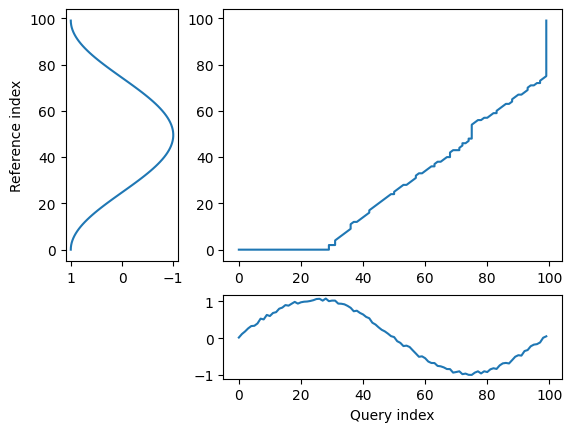

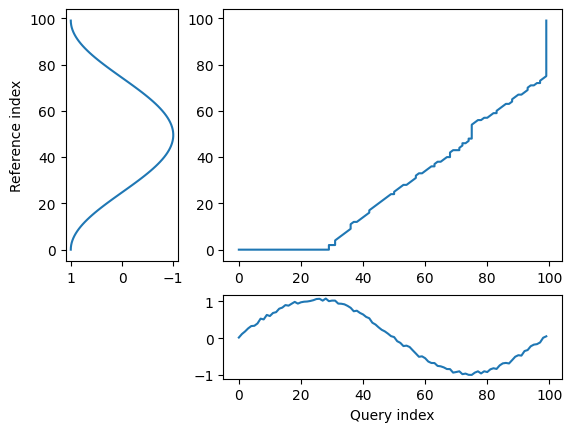

In [6]:
import dtw

alignment.plot(type="threeway")
# or
dtwPlotThreeWay(alignment)

In [11]:
import dtw

In [13]:
alignment = dtw.dtw(query, template, keep_internals=True)